# TODO

- [ ] Add Anna?
- [ ] Add Tom Data?

# Import

In [1]:
# %pip install tabulate
# %pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("MOOC Data (2-14).xlsx")
df.head()

C:\Users\shust\AppData\Local\Temp\ipykernel_69776\2513403433.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Timestamp,Unnamed: 1,What is the current time?,Unnamed: 3,Graduation year,Major / Area of expertise,Experience with ML,May we quote you as an anonymously in our final writeup/presentation?,"[5] What are your general feelings about artificial intelligence, and the idea of creating explanations of its predictions?\n\nis your reaction more positive or negative?",Unnamed: 9,...,Favorite Explanation [LIME],Favorite Explanation [Shapley],Notes on comparing your favorite explanations (optional),How much do you trust each of these techniques to explain a model's thought process in new examples? [Anchor],How much do you trust each of these techniques to explain a model's thought process in new examples? [LIME],How much do you trust each of these techniques to explain a model's thought process in new examples? [Shapley],We did not pick these examples to be representative. (The MOOC model is accurate over 98% of the time) but we wanted to show you interesting edge cases to illustrate the different explainable AI techniques.\n\nHow did these explanations affect your trust in the underlying model?,"Did any of these techniques really stand out as better or worse than the others, or did they seem fairly analogous?",Are you okay with there being discrepancies between explainers that purport to explain the (data point in the) same model?,Any other notes in conclusion?
0,2024-02-10 19:56:22,NaN,19:23:00,NaN,2024,Studio Art,No experience,Yes,"- ""Oh tht's kinda cool, ... idk""\n- neutral",NaN,...,1st,1st,- shapley and lime in first - I like lime colo...,Don't Trust,Trust,Trust,"- ""It didn't give me any real reasoning""\n- ""T...","LIME == SHAP\nAnchor worse\n- ""I mean, ehh...""","- ""I feel like ideally there shouldn't be""\n- ...",NaN
1,2024-02-10 21:24:23,NaN,20:32:00,NaN,2024,"CS, CogSci Minor","Completed CS 320/321, messed with ChatGPT, bee...",Maybe (ask me for permission),- nuanced (positive and negative)\n- AI is a p...,NaN,...,1st,2nd,"- ""LIME is getting the best of the other two. ...",Trust,Trust,Trust,"""LIME and Shapley increased my trust in the mo...","""LIME stood out as way better (see prev questi...","""Yeah. They're getting explanations in differe...","- ""This is pretty fucking cool!""\n- This is a ..."
2,2024-02-11 02:53:13,NaN,01:48:00,NaN,2024,CS,No experience,Yes,"- ""Really Fast, breaking things. Cannot keep up.""",NaN,...,1st,3rd,"- ""Anchor and LIME both give you a standard (t...",Trust,Trust,Trust,"- ""I trust none of these because it [the model...","- ""They're kinda the same. Nothing crazy, just...","- ""No.""\n- ""If the thought process is meant to...","- ""I would trust Shapley's explanation way mor..."
3,2024-02-12 23:58:57,NaN,23:00:00,NaN,2024,SOAN,No experience,Yes,"- Thinks about racism, white tech bros who don...",NaN,...,2nd,1st,"- ""Shapley was the arrows showing which way, w...",Don't Trust,Don't Trust,Don't Trust,"- ""They don't really. I don't know which expla...","- ""I really liked Shapley.""","- ""I'm not comfortable with this. It makes me ...","- ""Shapley's global explanations makes me like..."
4,2024-02-11 02:53:19,NaN,01:48:00,NaN,2024,Political Science; Public policy minor; Latin ...,No experience,Yes,"- ""Fast""\n- ""Reliable, but not as direct as I ...",NaN,...,3rd,2nd,"- ""Anchor is so straightforward. I can see if ...",Trust,Trust,Trust,"- ""Anchor made me really trust the model. When...","- ""I HATE LIME!""\n- ""Anchor was so nice and si...","- ""No.""\n- ""It's important to highlight the di...","- ""At first, I thought these were all on diffe..."


# Recoding

In [3]:
from datetime import datetime


df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["End Time"] = df["Timestamp"].dt.time
df.rename(columns={"What is the current time?": "Start Time"}, inplace=True)

def calculate_minutes(time1:datetime, time2:datetime):
	try:
		format = '%H:%M:%S'
		time1 = datetime.strptime(time1.strftime('%H:%M:%S'), format)
		time2 = datetime.strptime(time2.strftime('%H:%M:%S'), format)
		timedelta = time2 - time1
		minutes = timedelta.total_seconds() / 60
		return abs(minutes)
	except:
		return np.nan

df["Minutes"] = df.apply(lambda row: calculate_minutes(row["Start Time"], row["End Time"]), axis=1)

In [4]:
def code_experence_ml(experience:str):
	if "Completed CS 320" in experience:
		return "5:Completed ML Course"
	elif "Currently taking CS" in experience:
		return "4:Enrolled In ML Course"
	elif "Extracurricular experience" in experience:
		return "3:Extracurricular Experience in ML"
	elif "Experience with generative AI" in experience:
		return "2:Dabbled in ML"
	elif "dabbeled" in experience:
		return "2:Dabbled in ML"
	elif "No experience" in experience:
		return "1:No ML Experience"
	else:
		return 100

df["Coded Experience with ML"] = df["Experience with ML"].apply(code_experence_ml)
df[["Experience with ML", "Coded Experience with ML"]]

,Experience with ML,Coded Experience with ML
0,No experience,1:No ML Experience
1,"Completed CS 320/321, messed with ChatGPT, bee...",5:Completed ML Course
2,No experience,1:No ML Experience
3,No experience,1:No ML Experience
4,No experience,1:No ML Experience
5,Experience with generative AI,2:Dabbled in ML
6,"Experience with generative AI, like twice ever",2:Dabbled in ML
7,Experience with generative AI,2:Dabbled in ML
8,Extracurricular experience: For internship wor...,3:Extracurricular Experience in ML
9,Occasionally dabbeled with gen ai (chatgpt and...,2:Dabbled in ML


# Helper Functions

In [5]:

def generate_graphs(data:pd.DataFrame, condition:str):
	order=['Anchor', 'Shapley', 'LIME']

	# GRAPH 1
	title = "How easy is this explanation to understand"
	# Create a bar chart where the x-axis the technique shown and the hight is the mean + std of the how easy is the explanation to understand
	sns.barplot(
		x="Technique Shown",
		y="How easy is this explanation to understand?",
		hue="Technique Shown",
		data=data,
		errorbar='sd',
		order=order,
		hue_order=order,
	).set(
		ylabel="Mean + std",
		title=f"{title}?",
	)

	sns.swarmplot(
		x="Technique Shown",
		y="How easy is this explanation to understand?",
		data=data,
		color="black",
		order=order,
		hue_order=order,
	)

	plt.savefig(f"{condition} - {title}.png")
	plt.show()


	# GRAPH 2
	title = "Do you agree that this explains how the model came to its conclusion"
	# Create a bar chart where the x-axis the technique shown and the hight is the mean + std of Do you agree that this explains how the model came to its conclusion?
	sns.barplot(
		x="Technique Shown",
		y="Do you agree that this explains how the model came to its conclusion?",
		hue="Technique Shown",
		data=data,
		errorbar='sd',
		order=order,
		hue_order=order,
	).set(
		ylabel="Mean + std",
		title=f"{title}?",
	)

	sns.swarmplot(
		x="Technique Shown",
		y="Do you agree that this explains how the model came to its conclusion?",
		data=data,
		color="black",
		order=order,
		hue_order=order,
	)

	plt.savefig(f"{condition} - {title}.png")
	plt.show()

	# GRAPH 3
	title = 'How Does Experience with ML Affect Model Understandability'
	sns.swarmplot(
		x="Coded Experience with ML",
		y="How easy is this explanation to understand?",
		data=data,
		hue="Technique Shown",
		order=sorted(data["Coded Experience with ML"].unique()),  # Sort categories alphabetically
		hue_order=order,
	).set(
		ylabel="Confidence in Understanding of Model",
		title=f"{title}?",
		yticks=range(0, 6),
	)

	plt.gcf().set_size_inches(15, 5)
	plt.savefig(f"{condition} - {title}.png")
	plt.show()

	# GRAPH 4
	title = 'How Does Experience with ML Affect Model Explainability'
	sns.swarmplot(
		x="Coded Experience with ML",
		y="Do you agree that this explains how the model came to its conclusion?",
		data=data,
		hue="Technique Shown",
		order=sorted(data["Coded Experience with ML"].unique()),  # Sort categories alphabetically
		hue_order=order,
	).set(
		ylabel="Confidence in Model's Explanation",
		title=f"{title}?",
		yticks=range(0, 6),
	)

	plt.gcf().set_size_inches(15, 5)
	plt.savefig(f"{condition} - {title}.png")
	plt.show()

In [6]:
from typing import List

def find_partial_column(name:str, data) -> str:
	return data.loc[:, data.columns.str.contains(name)].columns[0]

def get_pandas_index_from_spreadsheet_index(index:str):
	numbers = [ord(i)-65 for i in index]
	return numbers[0] if len(numbers) == 1 else (numbers[0]+1)*26 + numbers[1]


def extract_sample(columns:List[str]):
	relivant_indexes_for_sample = [get_pandas_index_from_spreadsheet_index(i) for i in columns]
	sample = pd.concat([df.iloc[:, relivant_indexes_for_sample].copy(), df["Minutes"], df["Coded Experience with ML"]], axis=1)
	sample.rename(columns={
		find_partial_column("Do you think they will complete the course?", sample): "Do you think they will complete the course?",
		find_partial_column("Do you think the model will predict", sample): "Do you think the model will predict that the student completes the course?",
		find_partial_column("Technique Shown", sample): "Technique Shown",
		find_partial_column("On a scale of 5, how easy is this explanation to understand?", sample): "How easy is this explanation to understand?",
		find_partial_column("Do you agree that this explains how the model came to its conclusion?", sample): "Do you agree that this explains how the model came to its conclusion?"
	}, inplace=True)
	return sample

def print_yes_no_count(data:pd.DataFrame):
	print(
		data["Do you think they will complete the course?"].value_counts(),
		"\n\n",
		data["Do you think the model will predict that the student completes the course?"].value_counts()
	)

# Sample B

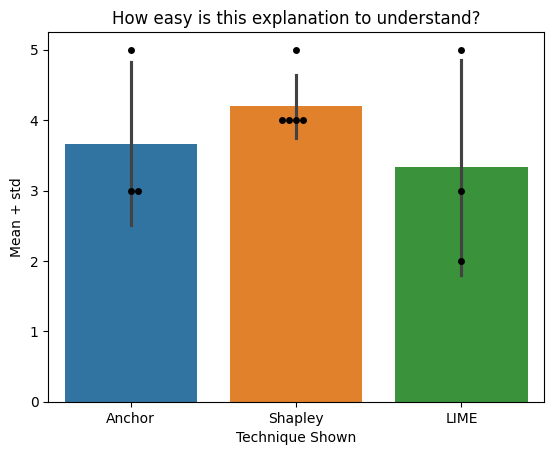

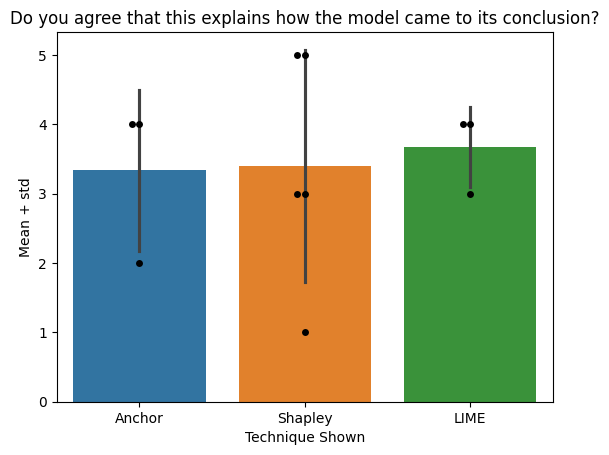

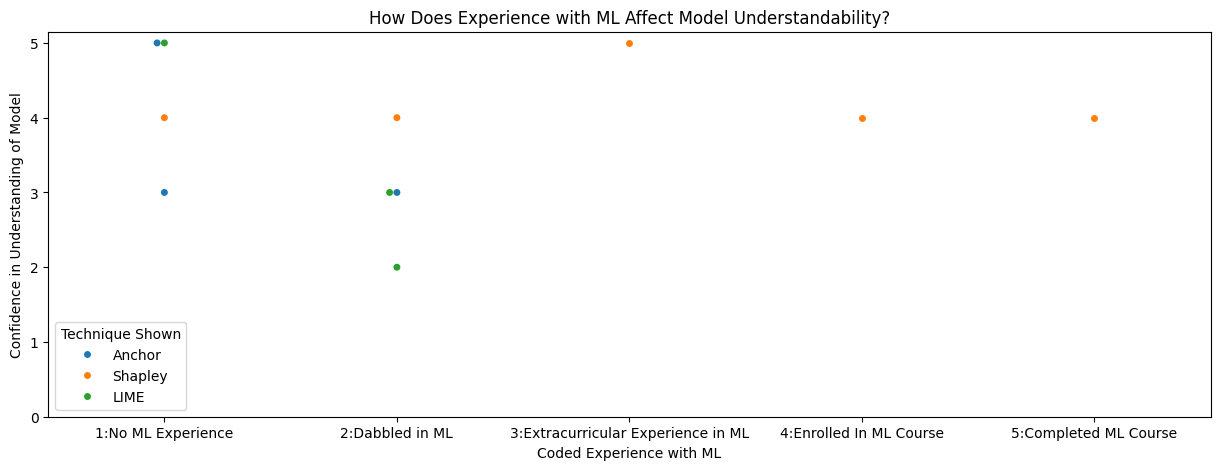

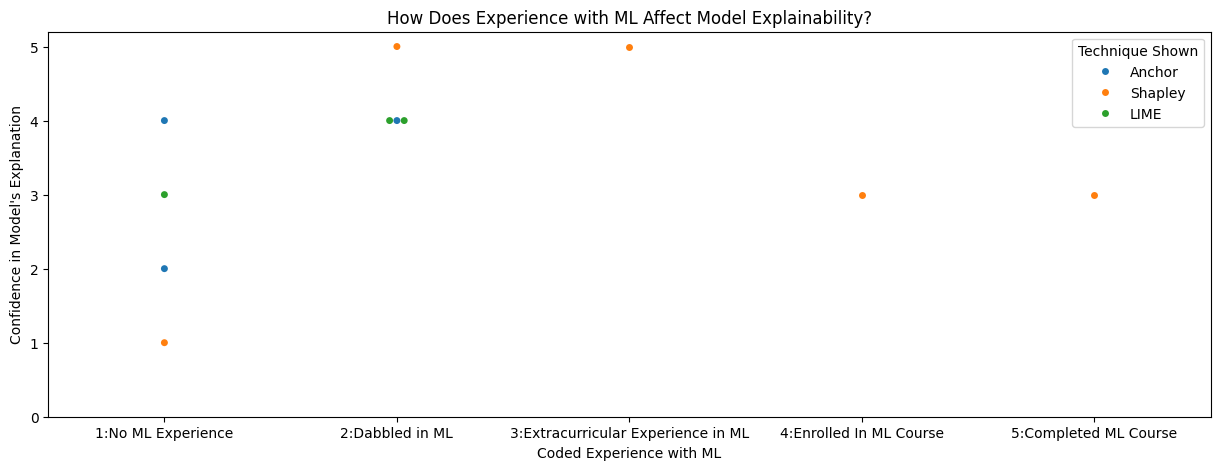

Do you think they will complete the course?
Yes    11
Name: count, dtype: int64 

 Do you think the model will predict that the student completes the course?
Yes    10
No      1
Name: count, dtype: int64


,Do you think they will complete the course?,Do you think the model will predict that the student completes the course?,Technique Shown,How easy is this explanation to understand?,Do you agree that this explains how the model came to its conclusion?,Minutes,Coded Experience with ML
0,Yes,Yes,Anchor,3,2,33.366667,1:No ML Experience
1,Yes,Yes,Shapley,4,3,52.383333,5:Completed ML Course
2,Yes,Yes,LIME,5,3,65.216667,1:No ML Experience
3,Yes,No,Shapley,4,1,58.950000,1:No ML Experience
4,Yes,Yes,Anchor,5,4,65.316667,1:No ML Experience
5,Yes,Yes,Anchor,3,4,42.150000,2:Dabbled in ML
6,Yes,Yes,LIME,3,4,23.116667,2:Dabbled in ML
7,Yes,Yes,LIME,2,4,NaN,2:Dabbled in ML
8,Yes,Yes,Shapley,5,5,NaN,3:Extracurricular Experience in ML
9,Yes,Yes,Shapley,4,5,26.683333,2:Dabbled in ML


In [7]:
sample_b = extract_sample(columns=['M','N','P','Q','R'])
condition = "Sample B"
generate_graphs(
	data = sample_b,
	condition = condition
)

print_yes_no_count(sample_b)

sample_b.to_markdown(f"{condition}.md", index=False)
sample_b

# Sample C

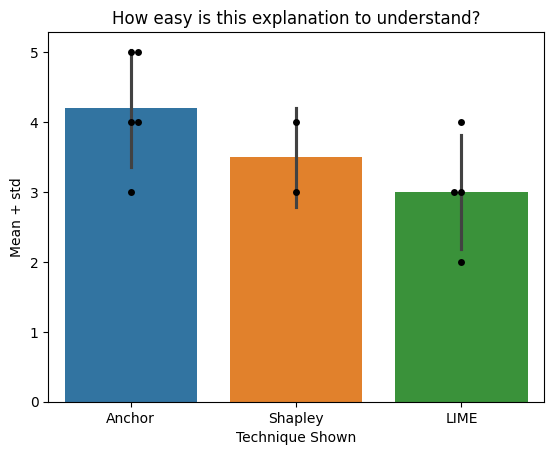

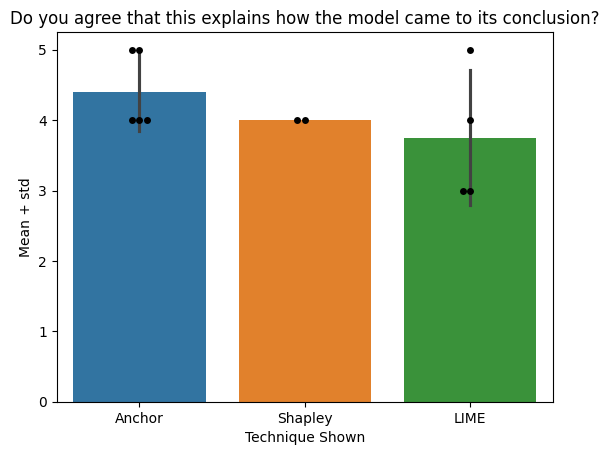

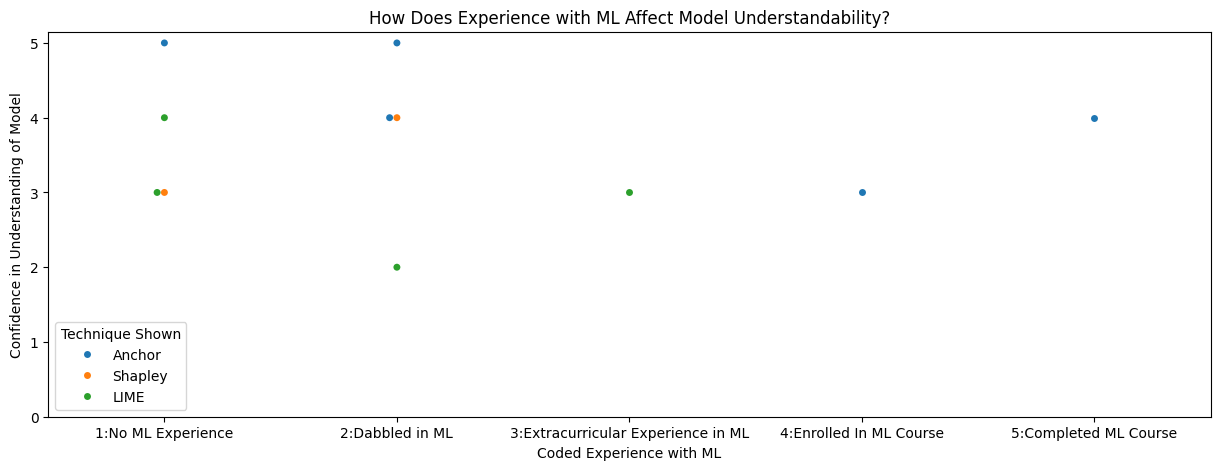

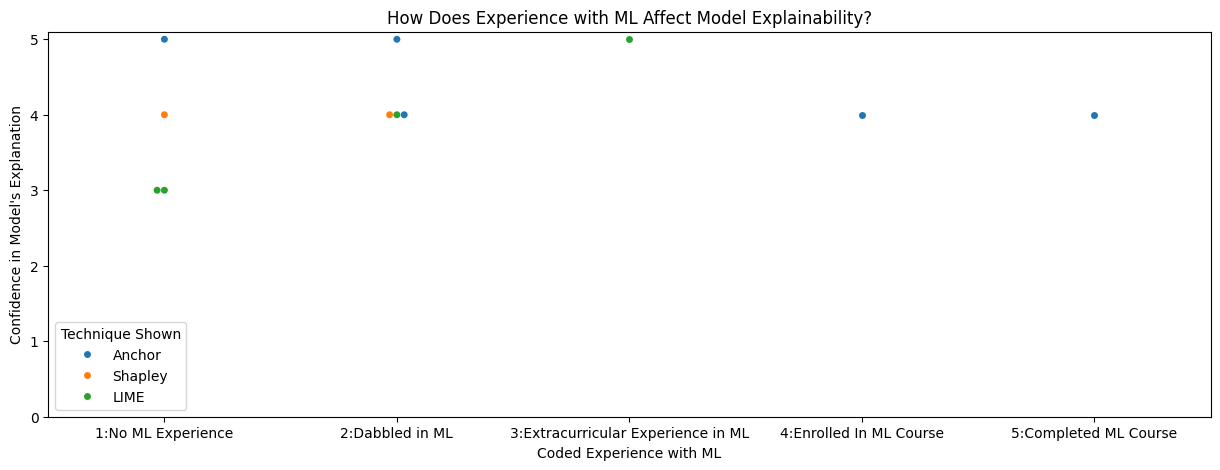

Do you think they will complete the course?
No        10
Unsure     1
Name: count, dtype: int64 

 Do you think the model will predict that the student completes the course?
Yes    6
No     5
Name: count, dtype: int64


,Do you think they will complete the course?,Do you think the model will predict that the student completes the course?,Technique Shown,How easy is this explanation to understand?,Do you agree that this explains how the model came to its conclusion?,Minutes,Coded Experience with ML
0,No,No,LIME,4,3,33.366667,1:No ML Experience
1,No,Yes,Anchor,4,4,52.383333,5:Completed ML Course
2,No,Yes,Shapley,3,4,65.216667,1:No ML Experience
3,No,No,Anchor,5,5,58.950000,1:No ML Experience
4,No,Yes,LIME,3,3,65.316667,1:No ML Experience
5,No,No,LIME,2,4,42.150000,2:Dabbled in ML
6,Unsure,Yes,Shapley,4,4,23.116667,2:Dabbled in ML
7,No,No,Anchor,4,4,NaN,2:Dabbled in ML
8,No,Yes,LIME,3,5,NaN,3:Extracurricular Experience in ML
9,No,Yes,Anchor,5,5,26.683333,2:Dabbled in ML


In [8]:
sample_c = extract_sample(columns=['S','T','V','W','X'])
condition = "Sample C"

generate_graphs(
	data = sample_c,
	condition = condition
)
print_yes_no_count(sample_c)
sample_c.to_markdown(f"{condition}.md", index=False)
sample_c

# Sample D

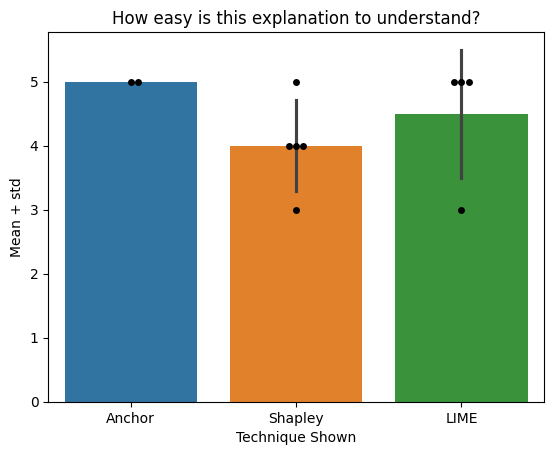

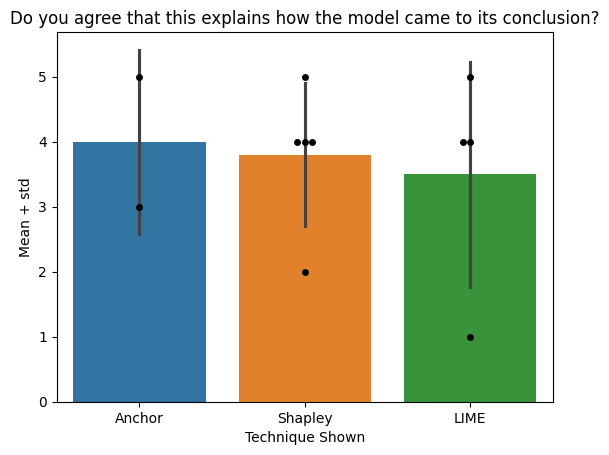

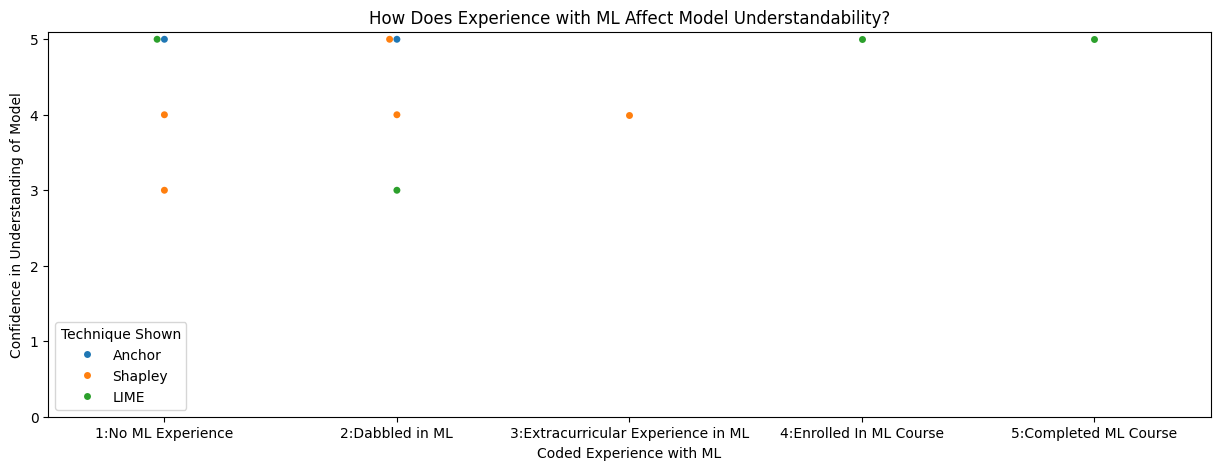

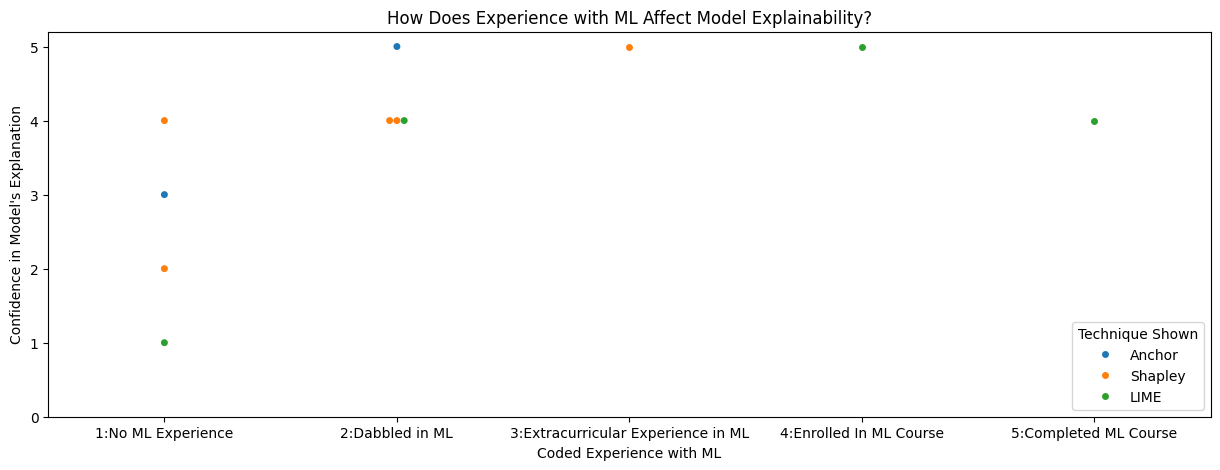

Do you think they will complete the course?
No    11
Name: count, dtype: int64 

 Do you think the model will predict that the student completes the course?
No     8
Yes    3
Name: count, dtype: int64


,Do you think they will complete the course?,Do you think the model will predict that the student completes the course?,Technique Shown,How easy is this explanation to understand?,Do you agree that this explains how the model came to its conclusion?,Minutes,Coded Experience with ML
0,No,No,Shapley,4,4,33.366667,1:No ML Experience
1,No,No,LIME,5,4,52.383333,5:Completed ML Course
2,No,Yes,Anchor,5,3,65.216667,1:No ML Experience
3,No,No,LIME,5,1,58.950000,1:No ML Experience
4,No,Yes,Shapley,3,2,65.316667,1:No ML Experience
5,No,No,Shapley,4,4,42.150000,2:Dabbled in ML
6,No,Yes,Anchor,5,5,23.116667,2:Dabbled in ML
7,No,No,Shapley,5,4,NaN,2:Dabbled in ML
8,No,No,Shapley,4,5,NaN,3:Extracurricular Experience in ML
9,No,No,LIME,3,4,26.683333,2:Dabbled in ML


In [9]:
sample_d = extract_sample(columns=['Y','Z','AB','AC','AD'])
condition = "Sample D"

generate_graphs(
	data = sample_d,
	condition = condition
)
print_yes_no_count(sample_d)
sample_d.to_markdown(f"{condition}.md", index=False)
sample_d

# Sample F

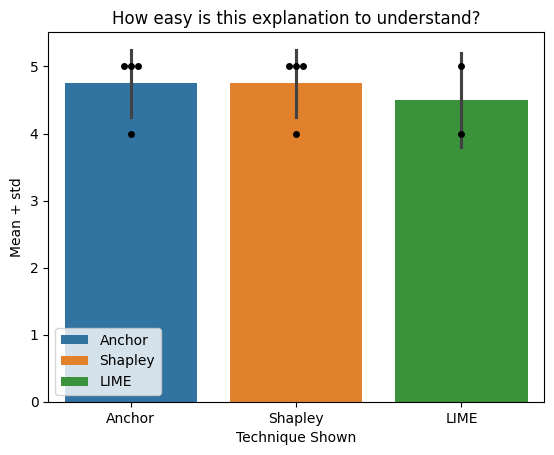

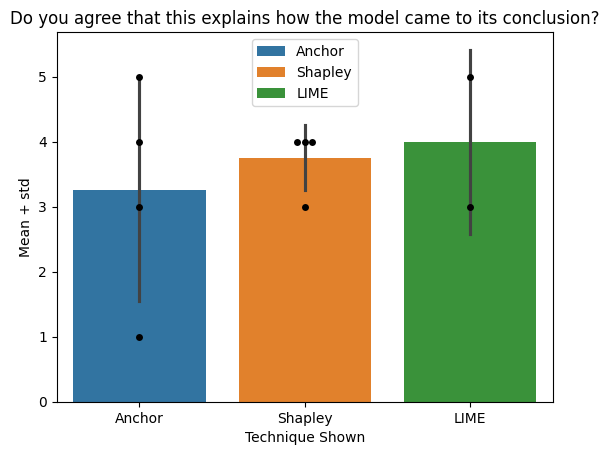

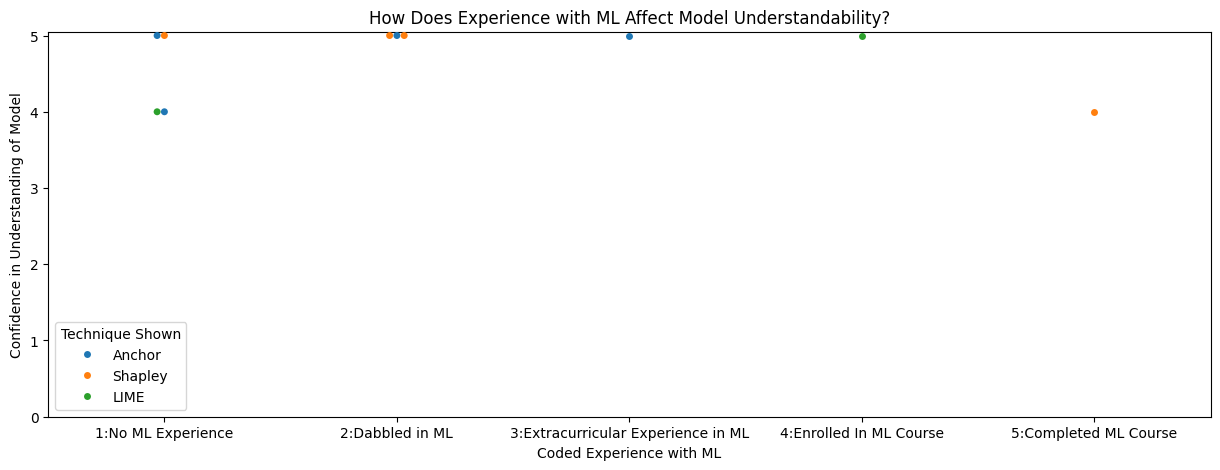

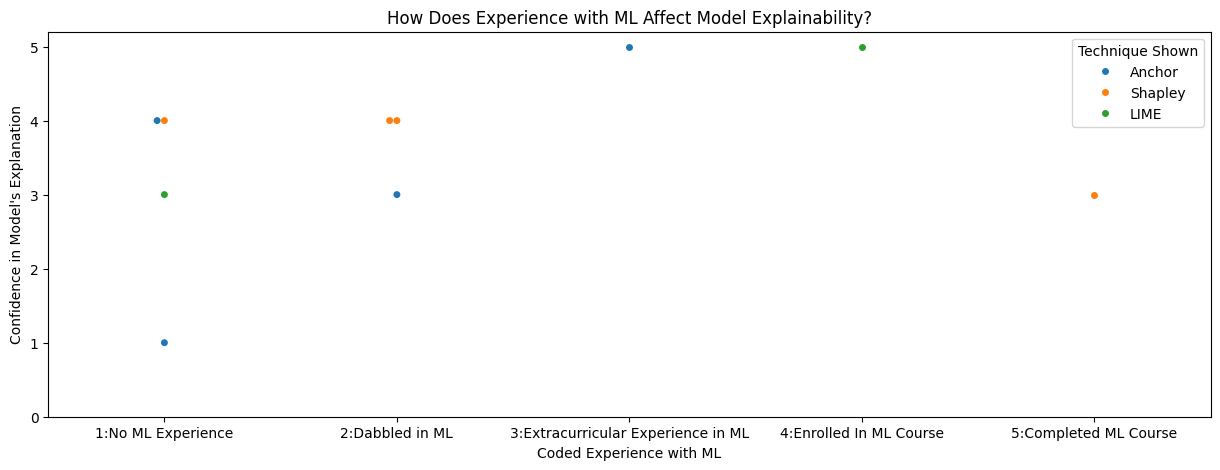

Do you think they will complete the course?
Yes    6
No     4
Name: count, dtype: int64 

 Do you think the model will predict that the student completes the course?
No        6
Yes       3
Unsure    1
Name: count, dtype: int64


,Do you think they will complete the course?,Do you think the model will predict that the student completes the course?,Technique Shown,How easy is this explanation to understand?,Do you agree that this explains how the model came to its conclusion?,Minutes,Coded Experience with ML
0,Yes,No,Anchor,4.0,1.0,33.366667,1:No ML Experience
1,Yes,No,Shapley,4.0,3.0,52.383333,5:Completed ML Course
2,Yes,No,LIME,4.0,3.0,65.216667,1:No ML Experience
3,No,Yes,Shapley,5.0,4.0,58.950000,1:No ML Experience
4,No,No,Anchor,5.0,4.0,65.316667,1:No ML Experience
5,No,No,Anchor,5.0,3.0,42.150000,2:Dabbled in ML
6,NaN,NaN,NaN,NaN,NaN,23.116667,2:Dabbled in ML
7,No,Yes,Shapley,5.0,4.0,NaN,2:Dabbled in ML
8,Yes,No,Anchor,5.0,5.0,NaN,3:Extracurricular Experience in ML
9,Yes,Yes,Shapley,5.0,4.0,26.683333,2:Dabbled in ML


In [10]:

sample_f = extract_sample(columns=['AE','AF','AH','AI','AJ'])
condition = "Sample F"

generate_graphs(
	data = sample_f,
	condition = condition
)
print_yes_no_count(sample_f)
sample_f.to_markdown(f"{condition}.md", index=False)
sample_f

# Sample G

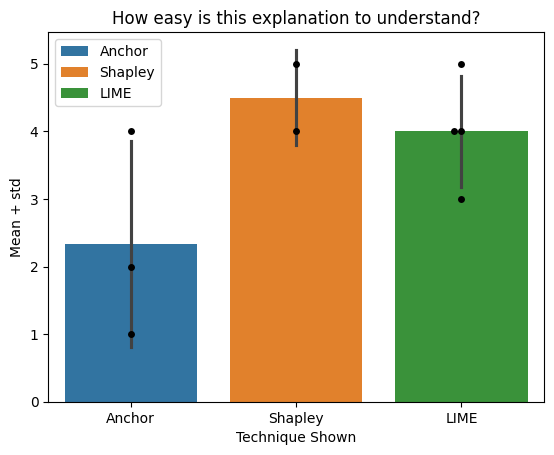

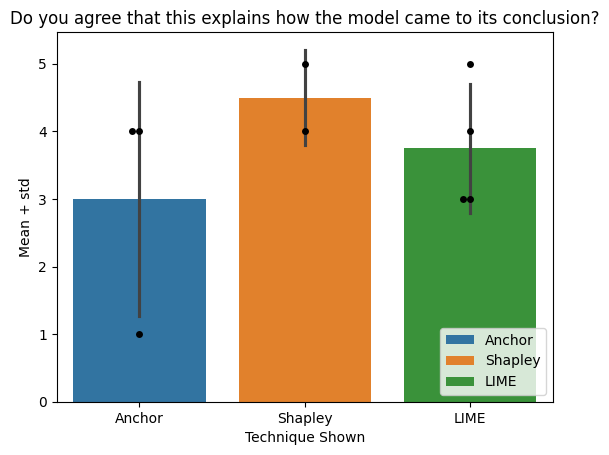

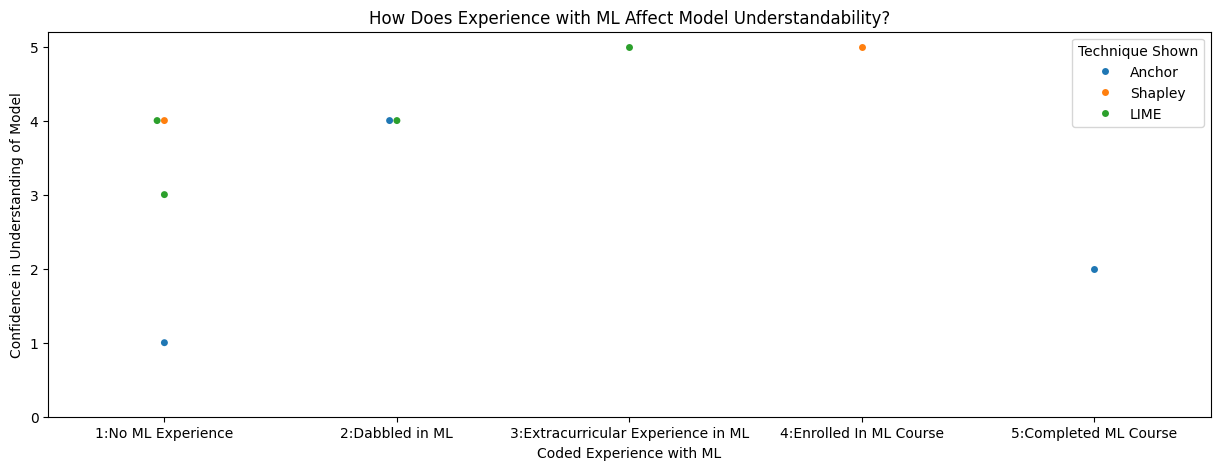

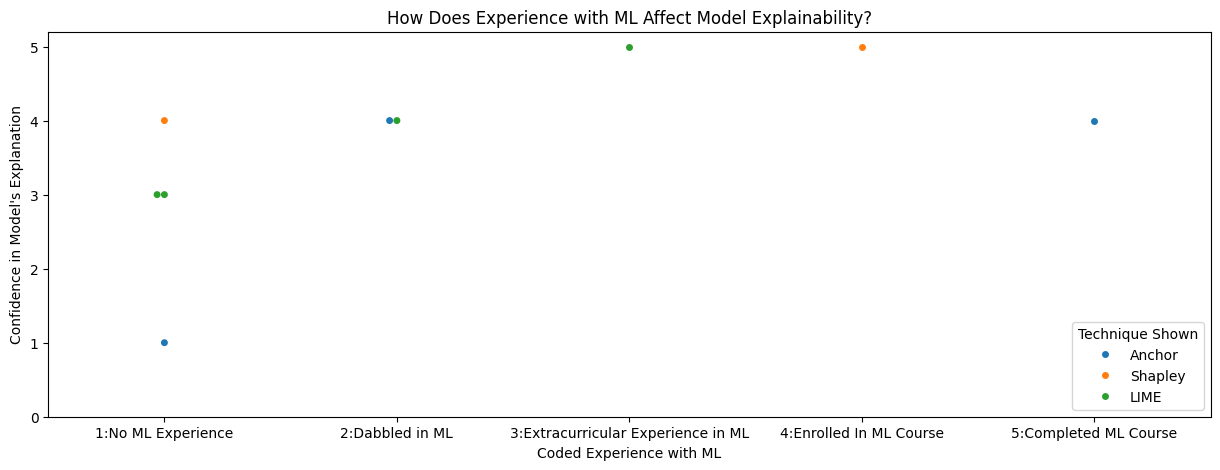

Do you think they will complete the course?
No     5
Yes    4
Name: count, dtype: int64 

 Do you think the model will predict that the student completes the course?
Yes    5
No     4
Name: count, dtype: int64


,Do you think they will complete the course?,Do you think the model will predict that the student completes the course?,Technique Shown,How easy is this explanation to understand?,Do you agree that this explains how the model came to its conclusion?,Minutes,Coded Experience with ML
0,Yes,No,LIME,3.0,3.0,33.366667,1:No ML Experience
1,Yes,Yes,Anchor,2.0,4.0,52.383333,5:Completed ML Course
2,No,Yes,Shapley,4.0,4.0,65.216667,1:No ML Experience
3,No,No,Anchor,1.0,1.0,58.950000,1:No ML Experience
4,No,Yes,LIME,4.0,3.0,65.316667,1:No ML Experience
5,No,No,LIME,4.0,4.0,42.150000,2:Dabbled in ML
6,NaN,NaN,NaN,NaN,NaN,23.116667,2:Dabbled in ML
7,NaN,NaN,NaN,NaN,NaN,NaN,2:Dabbled in ML
8,Yes,Yes,LIME,5.0,5.0,NaN,3:Extracurricular Experience in ML
9,No,Yes,Anchor,4.0,4.0,26.683333,2:Dabbled in ML


In [11]:

sample_g = extract_sample(columns=['AK','AL','AN','AO','AP'])
condition = "Sample G"

generate_graphs(
	data = sample_g,
	condition = condition
)
print_yes_no_count(sample_g)
sample_g.to_markdown(f"{condition}.md", index=False)
sample_g

# Everyone

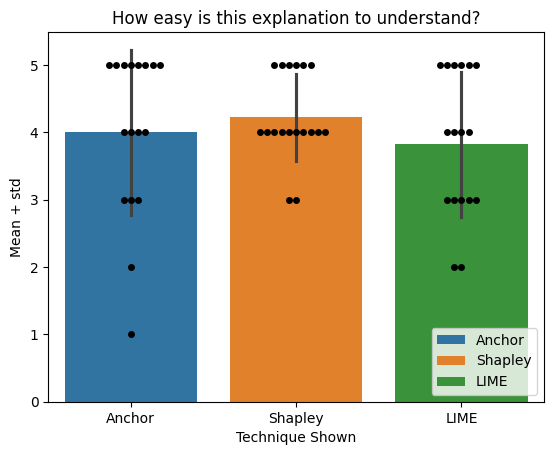

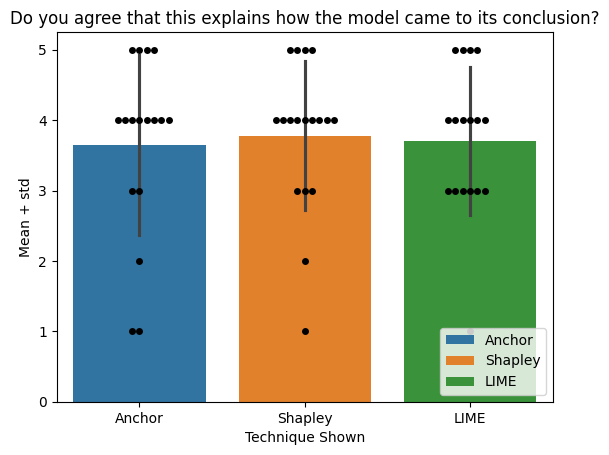

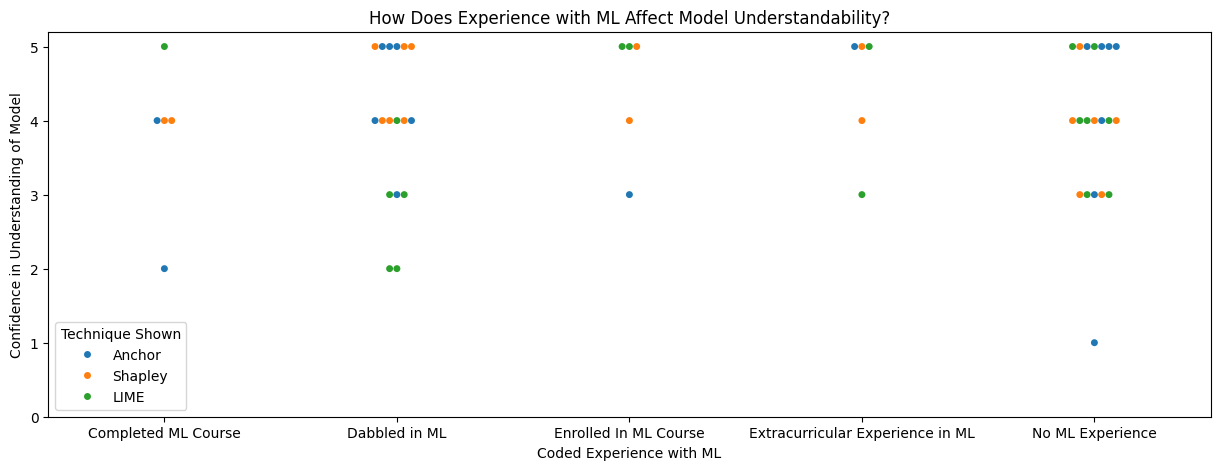

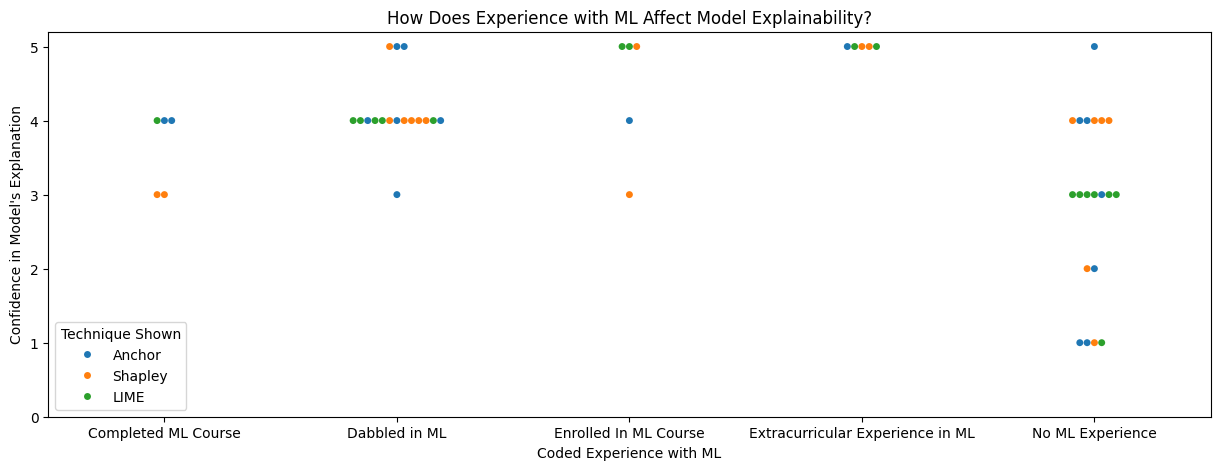

In [12]:
# show that less knolwedgable people prefer anchor, more knowledgeable people prefer SHAP
# remake basic graphs on all examples


total_sample = pd.concat([sample_b, sample_c, sample_d, sample_f, sample_g])
# get new indexes for the total sample
total_sample.reset_index(drop=True, inplace=True)
total_sample["Coded Experience with ML"] = total_sample["Coded Experience with ML"].apply(lambda x: x.split(":")[1])
condition = "Sample All"

generate_graphs(
	data = total_sample,
	condition = condition
)

In [13]:
def code_experence_ml_three(experience:str):
	if "5" in experience:
		return "3:Formal ML Experience"
	elif "4" in experience:
		return "3:Formal ML Experience"
	elif "3" in experience:
		return "2:Informal ML Experience"
	elif "2" in experience:
		return "2:Informal ML Experience"
	else:
		return "1:No ML Experience"

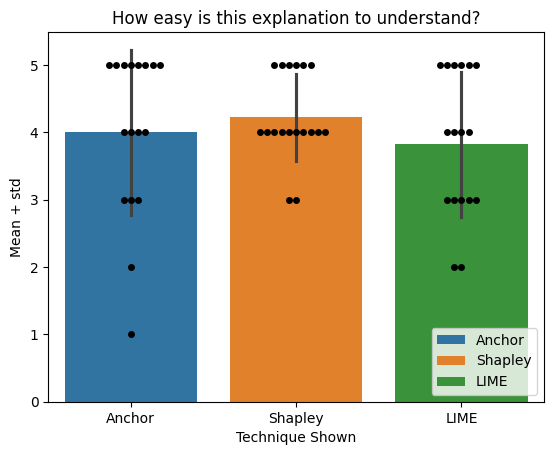

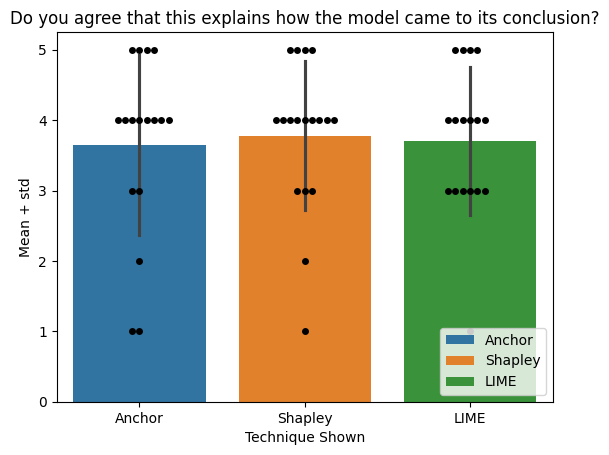

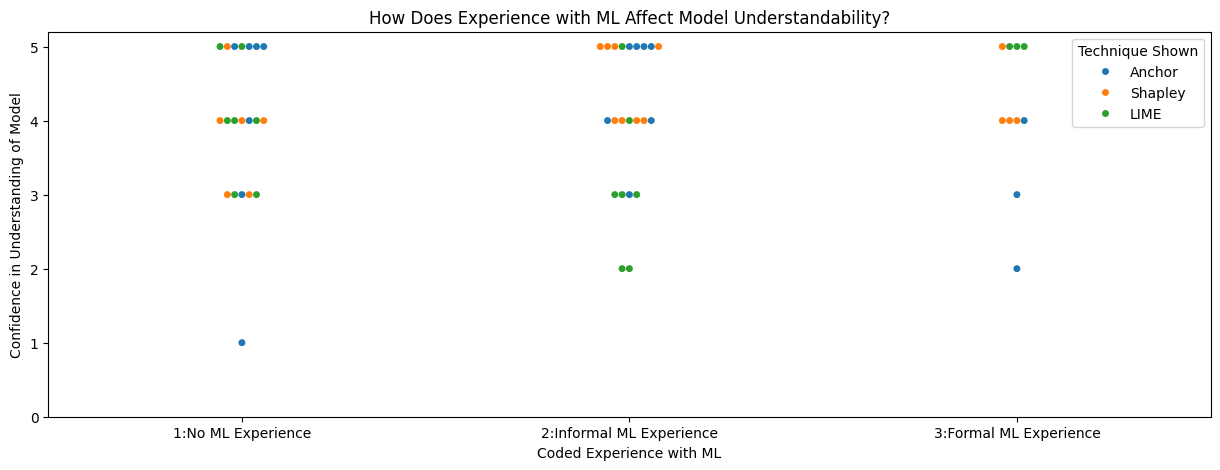

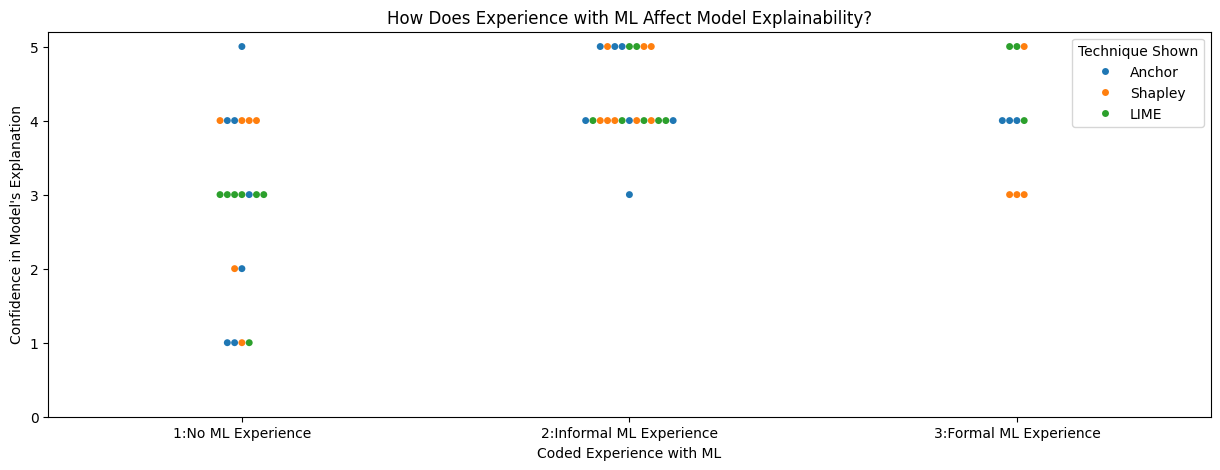

In [14]:
# show that less knolwedgable people prefer anchor, more knowledgeable people prefer SHAP
# remake basic graphs on all examples


total_sample = pd.concat([sample_b, sample_c, sample_d, sample_f, sample_g])
# get new indexes for the total sample
total_sample.reset_index(drop=True, inplace=True)


total_sample["Coded Experience with ML"] = total_sample["Coded Experience with ML"].apply(code_experence_ml_three)

condition = "Sample All"

generate_graphs(
	data = total_sample,
	condition = condition
)